In [1]:
import sys
import os
import pprint
app_path = os.path.join(os.path.expanduser('~/sandbox/doberman/'))
sys.path.append(app_path)
from doberman import Stock
from doberman import MACD
from doberman import Simulation
from doberman import DoberPlot

In [2]:
# Create 'stock_obj'
ticker = 'spy'
stock = Stock(ticker, config='../config.toml')
stock.load_data()
stock.snip_dates('2020-01-01', '2020-06-30')

stock-spy - INFO - SPY: loaded tsdb and set empty signal
stock-spy - INFO - SPY: pruned dates 2020-01-01 to 2020-06-30


In [3]:
# Calculate MACD signals
macd_signal = MACD(stock)

ema-spy - INFO - SPY: MACD calculated
ema-spy - INFO - SPY: Signal calculated


In [4]:
%%time
# Run simulation
sim = Simulation(macd_signal.stock_obj)
sim.paper_trade()

sim-spy - DEBUG - existing spy position is 0 shares
sim-spy - DEBUG - bought spy 3 @ $302.81
sim-spy - DEBUG - existing spy position is 3 shares
sim-spy - DEBUG - bought spy 3 @ $288.00
sim-spy - DEBUG - existing spy position is 6 shares
sim-spy - DEBUG - sold spy 3 @ $255.86
sim-spy - DEBUG - existing spy position is 0 shares
sim-spy - DEBUG - bought spy 3 @ $306.02
sim-spy - DEBUG - existing spy position is 3 shares
sim-spy - DEBUG - bought spy 3 @ $304.87


CPU times: user 1.36 s, sys: 55.2 ms, total: 1.42 s
Wall time: 1.41 s


In [5]:
doberplot = DoberPlot(stock)

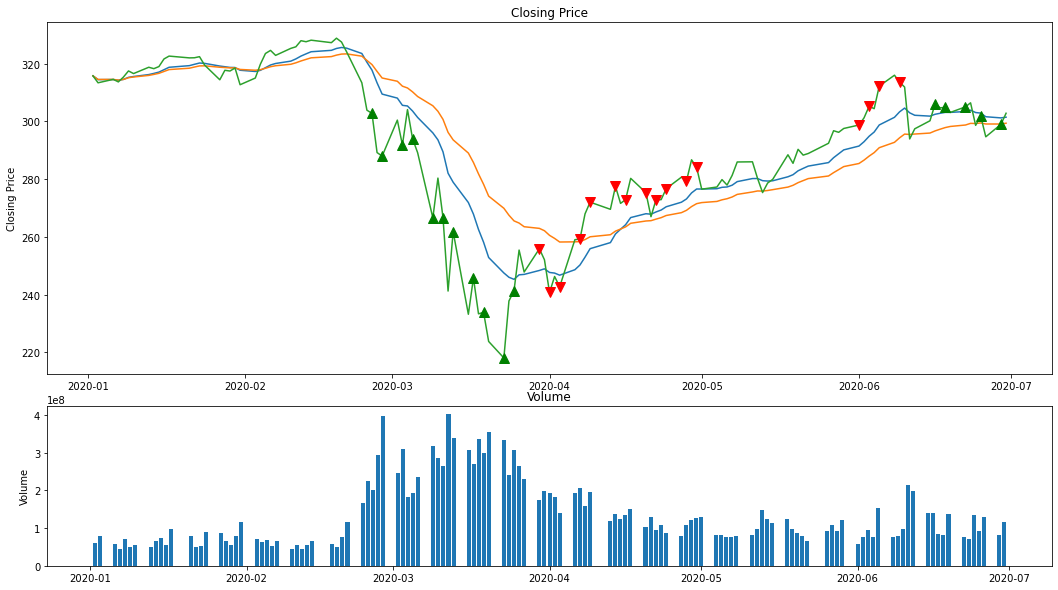

In [6]:
doberplot.order_signal(strategy_name='macd')

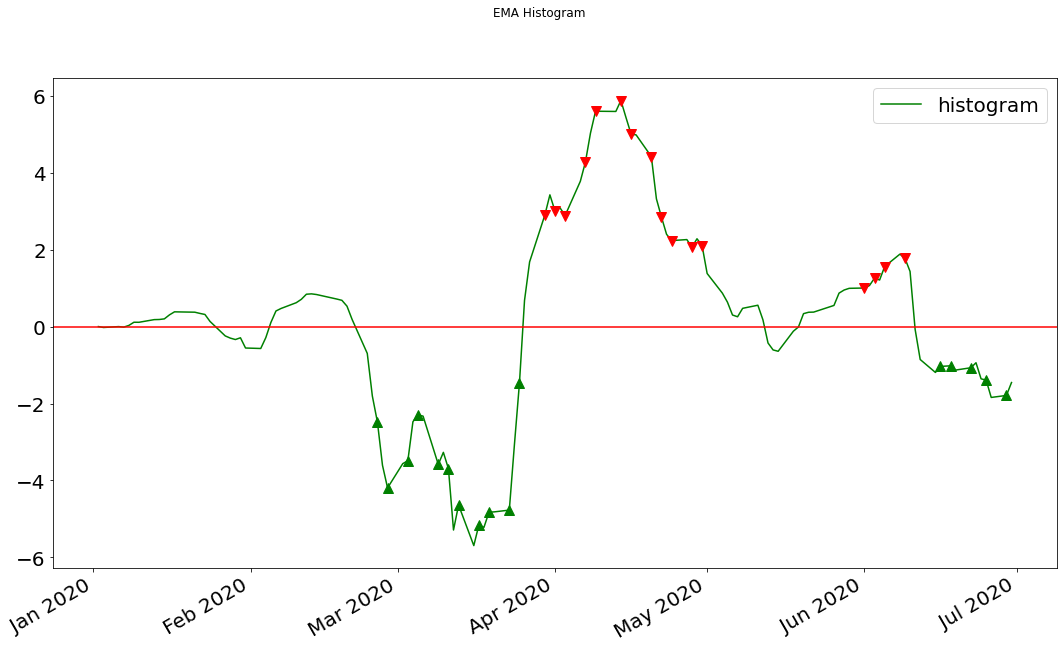

In [7]:
doberplot.histogram(strategy="macd")

In [8]:
sim.tradebook.trade_log

[(Timestamp('2020-02-26 00:00:00'), 'buy', 3, 'spy', 302.81),
 (Timestamp('2020-02-28 00:00:00'), 'buy', 3, 'spy', 288.0),
 (Timestamp('2020-03-30 00:00:00'), 'sell', 6, 'spy', 255.86),
 (Timestamp('2020-06-16 00:00:00'), 'buy', 3, 'spy', 306.02),
 (Timestamp('2020-06-18 00:00:00'), 'buy', 3, 'spy', 304.87)]

In [9]:
sim.tradebook.book

{'cash-usd': 7930.06, 'spy': 6}

In [10]:
sim.tradebook.get_stock_price('spy', '2020-06-30') * 97

29377.420000000002